In [15]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import seaborn as sb
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,r2_score
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train2=train.fillna(value=0)

train2.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [4]:
train2['Sex']=le.fit_transform(train2['Sex'])
#train['Embarked']=le.fit_transform(train['Embarked'])

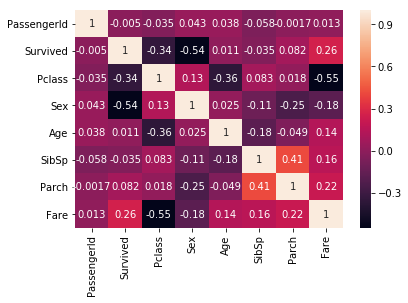

In [5]:
sb.heatmap(train2.corr(),annot=True)

In [6]:
x_train=train2[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]
y_train=train2['Survived']

In [7]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test['Sex']=le.fit_transform(test['Sex'])

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
x_test=test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]

In [11]:
x_test2=x_test.fillna(value=0)

In [12]:
y_test=pd.read_csv('gender_submission.csv')
y_test2=y_test['Survived']

In [13]:
x_train=train2[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]
y_train=train2['Survived']

In [16]:
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [17]:
y_pre=bnb.predict(x_test2)

In [18]:
accuracy_score(y_test2,y_pre)

1.0

In [19]:
confusion_matrix(y_test2,y_pre)

array([[266,   0],
       [  0, 152]], dtype=int64)

In [20]:
print(classification_report(y_test2,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418

